# College Major Data

This data is from 538.  [Data](https://github.com/fivethirtyeight/data/tree/master/college-majors), [Article](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/).

In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


## recent graduates

In [5]:
recent_grads = read_csv("data//recent-grads.csv")
recent_grads %>% head

Parsed with column specification:
cols(
  .default = col_integer(),
  Major = col_character(),
  Major_category = col_character(),
  ShareWomen = col_double(),
  Unemployment_rate = col_double()
)
See spec(...) for full column specifications.


Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,⋯,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.1205643,36,1976,⋯,270,1207,37,0.01838053,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.1018519,7,640,⋯,170,388,85,0.11724138,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.1530374,3,648,⋯,133,340,16,0.02409639,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.1073132,16,758,⋯,150,692,40,0.05012531,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0.3416305,289,25694,⋯,5180,16697,1672,0.06109771,65000,50000,75000,18314,4440,972
6,2418,NUCLEAR ENGINEERING,2573,2200,373,Engineering,0.1449670,17,1857,⋯,264,1449,400,0.17722641,65000,50000,102000,1142,657,244


To get started, let's look at some simple plots.

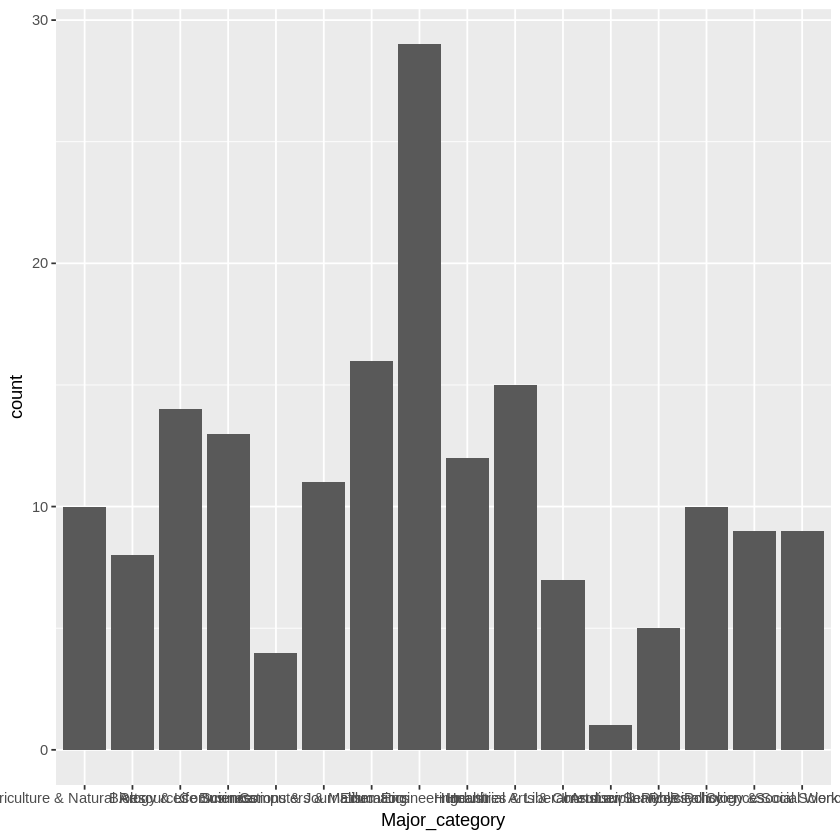

In [6]:
recent_grads %>%
    ggplot(aes(x = Major_category)) +
    geom_bar()

Oh no!  We can't see any of the tick marks.  Let's see if we can [rotate those a bit](https://stackoverflow.com/questions/1330989/rotating-and-spacing-axis-labels-in-ggplot2).

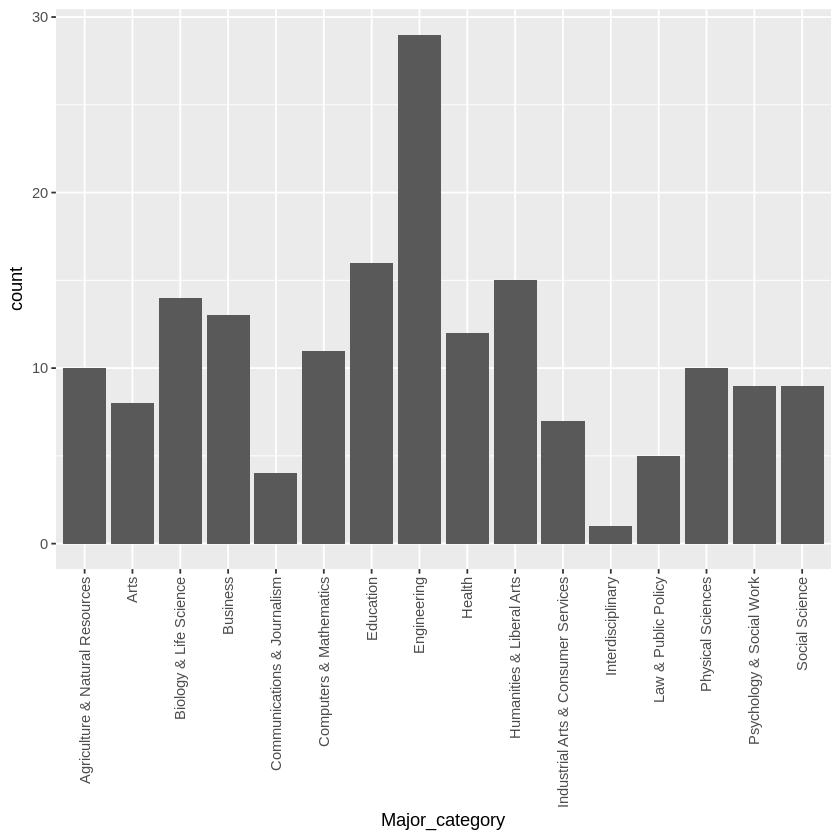

In [9]:
recent_grads %>%
    ggplot(aes(x = Major_category)) +
    geom_bar() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

Hmmm... I wonder if we can use a bit of dplyr to [sort those by frequency](https://stackoverflow.com/a/38663292/4330418)...

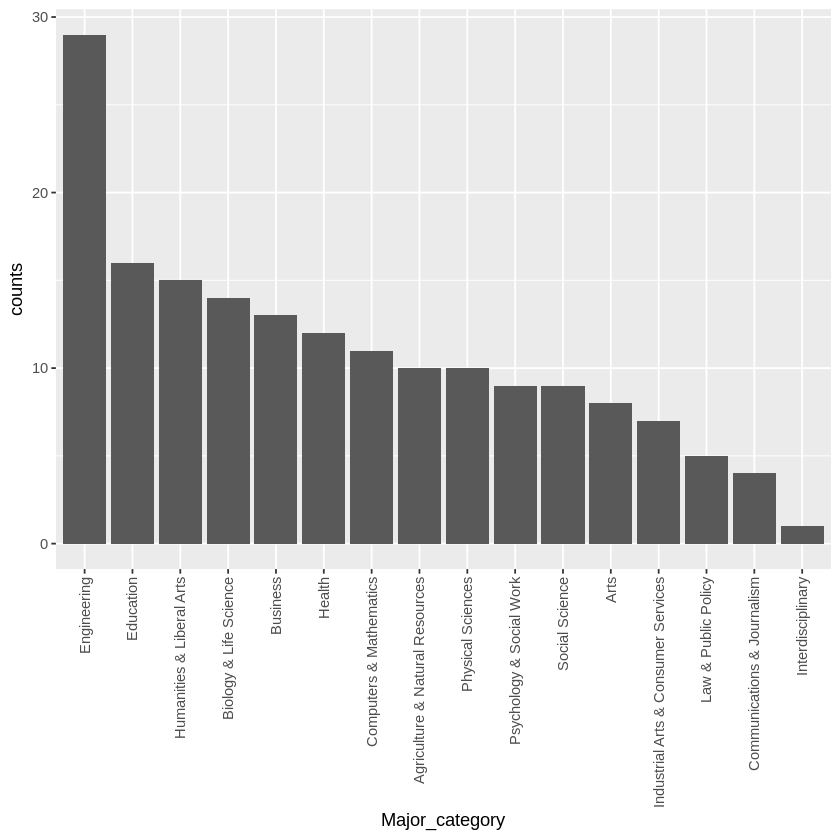

In [15]:
recent_grads %>%
    group_by(Major_category) %>%
    summarize(counts = n()) %>%
    arrange(-counts) %>%
    mutate(Major_category = factor(Major_category, Major_category)) %>%
    ggplot(aes(x = Major_category, y = counts)) +
        geom_bar(stat="identity") +
        theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

Saving 6.67 x 6.67 in image
Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

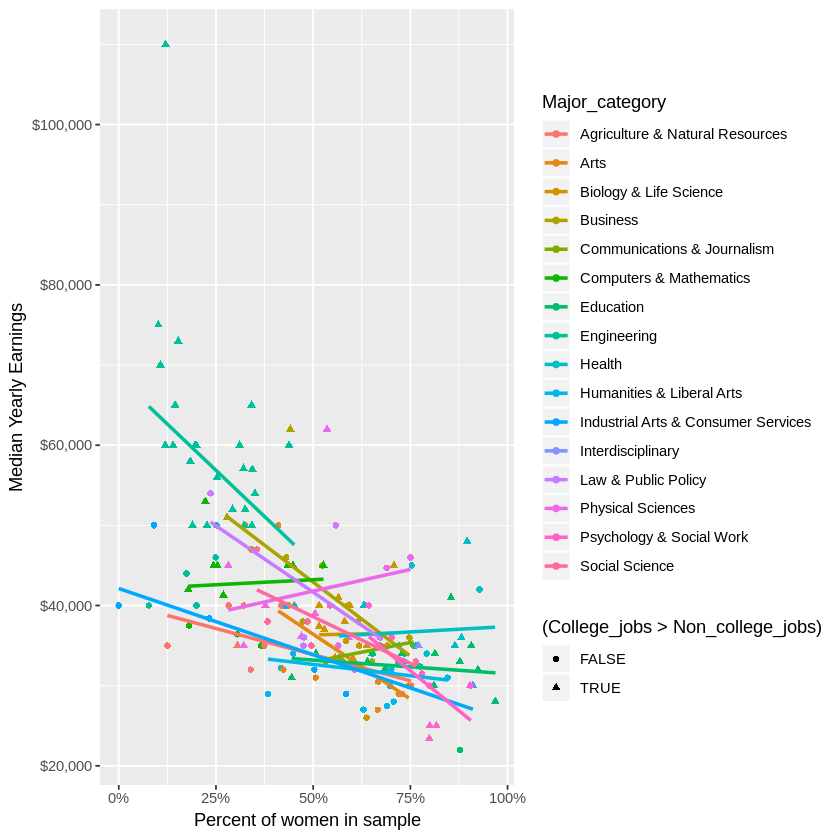

In [37]:
recent_grads %>%
    ggplot(aes(x = ShareWomen, y = Median)) +
    geom_point(aes(color=Major_category, shape=(College_jobs > Non_college_jobs))) +
    geom_smooth(aes(color=Major_category), method = "lm", se=F) +
    xlab("Percent of women in sample") +
    ylab("Median Yearly Earnings") +
    scale_y_continuous(labels = scales::dollar) +
    scale_x_continuous(labels = scales::percent)

ggsave("./figs/college-major-incomes.png")